<a href="https://colab.research.google.com/github/JakeLi2001/EverUp-Micro-Credential-Data-Analytics/blob/main/Python/Unit3_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [ ]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [ ]:
# Mean of all salaries
salary_mean = df["salary"].mean()
print("The mean of all salaries: ", salary_mean)

The mean of all salaries:  113706.45843828715


In [ ]:
# Median of all salaries
salary_median = df["salary"].median()
print("The median of all salaries: ", salary_median)

The median of all salaries:  107300.0


# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [ ]:
new_df = df[["sex", "salary"]]
print(new_df)

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[397 rows x 2 columns]


Finding the Median salary for all males

In [ ]:
MaleSalaryMedian = new_df[new_df["sex"] == "Male"].median()
print(MaleSalaryMedian)

salary    108043.0
dtype: float64


Finding the Median salary for all females

In [ ]:
FemaleSalaryMedian = new_df[new_df["sex"] == "Female"].median()
print(FemaleSalaryMedian)

salary    103750.0
dtype: float64


Comparing the Mean salary of Males and Females

In [ ]:
MaleSalaryMean = new_df[new_df["sex"] == "Male"].mean()
print(MaleSalaryMean)

salary    115090.418994
dtype: float64


In [ ]:
FemaleSalaryMean = new_df[new_df["sex"] == "Female"].mean()
print(FemaleSalaryMean)

salary    101002.410256
dtype: float64


In [ ]:
# The difference between mean salaries of male and female
Diff = MaleSalaryMean - FemaleSalaryMean
print(Diff)
print("The difference between mean salaries of male and female is:", Diff)

salary    14088.008738
dtype: float64
The difference between mean salaries of male and female is: salary    14088.008738
dtype: float64


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [ ]:
more_than_20years_services = df[df["yrs.service"] >= 20]
print(more_than_20years_services)

     Unnamed: 0  rank discipline  yrs.since.phd  yrs.service   sex  salary
3             4  Prof          B             45           39  Male  115000
4             5  Prof          B             40           41  Male  141500
6             7  Prof          B             30           23  Male  175000
7             8  Prof          B             45           45  Male  147765
8             9  Prof          B             21           20  Male  119250
..          ...   ...        ...            ...          ...   ...     ...
384         385  Prof          A             27           21  Male  125192
386         387  Prof          A             29           27  Male  139219
388         389  Prof          A             38           36  Male  119450
392         393  Prof          A             33           30  Male  103106
394         395  Prof          A             42           25  Male  101738

[157 rows x 7 columns]


In [ ]:
more_than_20years_services.count()

Unnamed: 0       157
rank             157
discipline       157
yrs.since.phd    157
yrs.service      157
sex              157
salary           157
dtype: int64

In [ ]:
print("The mean salary for people who have 20 or more years of experience is", more_than_20years_services["salary"].mean())

The mean salary for people who have 20 or more years of experience is 122520.65605095541


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [ ]:
mean_salary_20y_plus = more_than_20years_services["salary"].mean()
print(mean_salary_20y_plus)

122520.65605095541


In [ ]:
less_than_20years_services = df[df["yrs.service"] < 20]
print(less_than_20years_services)

     Unnamed: 0       rank discipline  ...  yrs.service     sex  salary
0             1       Prof          B  ...           18    Male  139750
1             2       Prof          B  ...           16    Male  173200
2             3   AsstProf          B  ...            3    Male   79750
5             6  AssocProf          B  ...            6    Male   97000
9            10       Prof          B  ...           18  Female  129000
..          ...        ...        ...  ...          ...     ...     ...
390         391       Prof          A  ...           19    Male  166605
391         392       Prof          A  ...           19    Male  151292
393         394       Prof          A  ...           19    Male  150564
395         396       Prof          A  ...           15    Male   95329
396         397   AsstProf          A  ...            4    Male   81035

[240 rows x 7 columns]


In [ ]:
mean_salary_20y_less = less_than_20years_services["salary"].mean()
print(mean_salary_20y_less)

107940.50416666667


In [ ]:
print("The mean salary for people who have 20 or more years of experience is", mean_salary_20y_plus)
print("The mean salary for people who have less than 20 years of experience is", mean_salary_20y_less)

The mean salary for people who have 20 or more years of experience is 122520.65605095541
The mean salary for people who have less than 20 years of experience is 107940.50416666667


People who have salary of greater than or equal to 200,000

In [ ]:
df[df["salary"] >= 200000]

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...

Only 3 professors have a salary of greater than or equal to 200,000.

# Rename values, subset columns, etc

In [ ]:
# Rename "Unnamed: 0" to "ID"
df.rename(columns = {"Unnamed: 0": "ID"}, inplace = True)
print(df)

      ID      rank discipline  yrs.since.phd  yrs.service   sex  salary
0      1      Prof          B             19           18  Male  139750
1      2      Prof          B             20           16  Male  173200
2      3  AsstProf          B              4            3  Male   79750
3      4      Prof          B             45           39  Male  115000
4      5      Prof          B             40           41  Male  141500
..   ...       ...        ...            ...          ...   ...     ...
392  393      Prof          A             33           30  Male  103106
393  394      Prof          A             31           19  Male  150564
394  395      Prof          A             42           25  Male  101738
395  396      Prof          A             25           15  Male   95329
396  397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]


In [ ]:
# Subset "ID", "rank", and "discipline"
df[["ID", "rank", "discipline"]]

,ID,rank,discipline
0,1,Prof,B
1,2,Prof,B
2,3,AsstProf,B
3,4,Prof,B
4,5,Prof,B
...,...,...,...
392,393,Prof,A
393,394,Prof,A
394,395,Prof,A
395,396,Prof,A


# Create some simple visualizations showing some simple statistics

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f445b00bc90>,
      dtype=object)

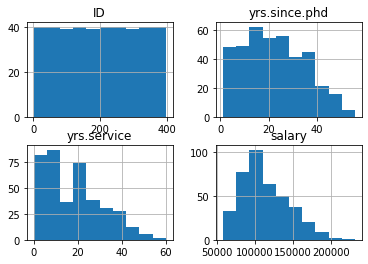

In [ ]:
df.hist()

     yrs.service  salary
0             18  139750
1             16  173200
2              3   79750
3             39  115000
4             41  141500
..           ...     ...
392           30  103106
393           19  150564
394           25  101738
395           15   95329
396            4   81035

[397 rows x 2 columns]


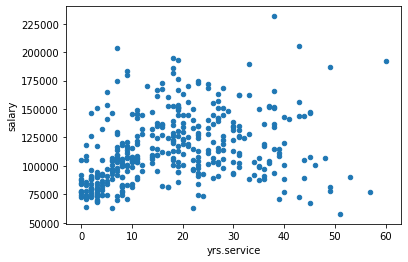

In [ ]:
salary_vs_years_services = df[["yrs.service", "salary"]]
print(salary_vs_years_services)
# Scatter plot of years in service vs salary
salary_vs_years_services.plot(x = "yrs.service", y = "salary", kind = "scatter")

Your observations from the visuals: 

The histogram of salary is skewed to the right.

More years of service = higher salary

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here...

1. I found that the mean of all salaries is 113,706 and the median is 107,300.
2. Male mean salary is higher than female mean salary.
3. People who have 20 or more years of experience have a higher salary than those who have less than 20 years of experience.
4. Only 3 professors have a salary higher than $200,000.

I also discovered that
1. Most professors are in the range of having 0 to 10 years of experience.
2. Salary has a correlation with years of service. More years of service tend to have a higher salary.





